### We have a total of 10 questions each posed as a pair of polar opposite beliefs. First, we would like to remind ourselves what the questions are.

|5 |4 |3 |2 |1 |
|--- |--- |--- |--- |--- |
|***Strongly believe in (A)*** |***Somewhat believe in (A)***  |***Undecided*** |***Somewhat believe in (B)***  |***Strongly believe in (B)***|

1. **Religious vs. atheist:** Belief in A) mainstream theological systems such as Islam and Christianity, or conversely, B) scepticism about the existence of god(s).

2. **Spiritual vs. materialist:** Belief in A) non-material phenomena such as spirits, the paranormal, a non-material soul etc, or conversely, B) the belief only in what science can reliably observe.

3. **Individualist vs. communitarian:** Belief in A) self-interest - strong belief in need to meet your own needs, through maximizing pleasure, happiness or other fundamental values, or belief in B) the good of all before the good of the individual.

4. **Democratic vs. authoritarian:** Belief in A) common, social institutions and the exercise of reason to sustain and improve them (through contracts, constitutions etc) , or conversely belief in B) the need for authoritative, powerful leadership.

5. **Egalitarian vs. aristocratic:** Belief in A) the importance of equality in human society, and forms of participation through equality, or the converse, B) tolerance of inequalities (financial, gender, race) and the over-riding value of some voices over others.

6. **Materialist vs. non-materialist of the mind:** Belief that A) the human mind will ultimately be understood in terms of scientifically observable physical/energy/informational processes, or conversely, B) that the mind is ultimately not explicable in materialistic terms.

7. **Agency vs. determinism:** Belief that A) we have genuine choice about at least some of our behaviour (free will), or conversely that B) our behaviour is determined,  and that any sense of free-will is illusory.

8. **Epistemological certainty vs. skepticism:** Belief that A) at least some knowledge can be sure/certain/undoubted, or conversely that B) no knowledge is sufficiently sure that it is certain, and beliefs are the most certain types of knowledge.

9. **Existential meaning vs. meaninglessness:** Belief that A) human life is meaningful,  and has genuine significance, or conversely that B) it has no meaning and is an arbitrary and accidental sequence of events of no significance.

10. **Moral absolutism vs. relativism:** Belief that A) there are absolute moral values, which remain true regardless of circumstances or consequences, or conversely belief that B) moral values can change and are always relative to a particular society or time.

## Summary of results from 23 Jan 2016 (n = 22)

In [40]:
bl <- read.csv('Core Beliefs experiment.csv', header=F)
names(bl) <- c('Religious','Spiritual','Individualist','Democratic','Egalitarian',
               'Mind.Materialist','Agency','Epist.Certainty','Exist.Meaning',
               'Moral.Absolutist')
bmat <- as.matrix(bl)

### 1. Average scores for each question (out of maximum of 5)

In [41]:
av <- round(colSums(bl)/nrow(bl),2)
av

Religious        Spiritual    Individualist       Democratic 
            1.95             2.14             3.45             4.00 
     Egalitarian Mind.Materialist           Agency  Epist.Certainty 
            3.86             3.75             3.45             3.64 
   Exist.Meaning Moral.Absolutist 
            3.09             3.00

### 2. Distribution of scores for each question

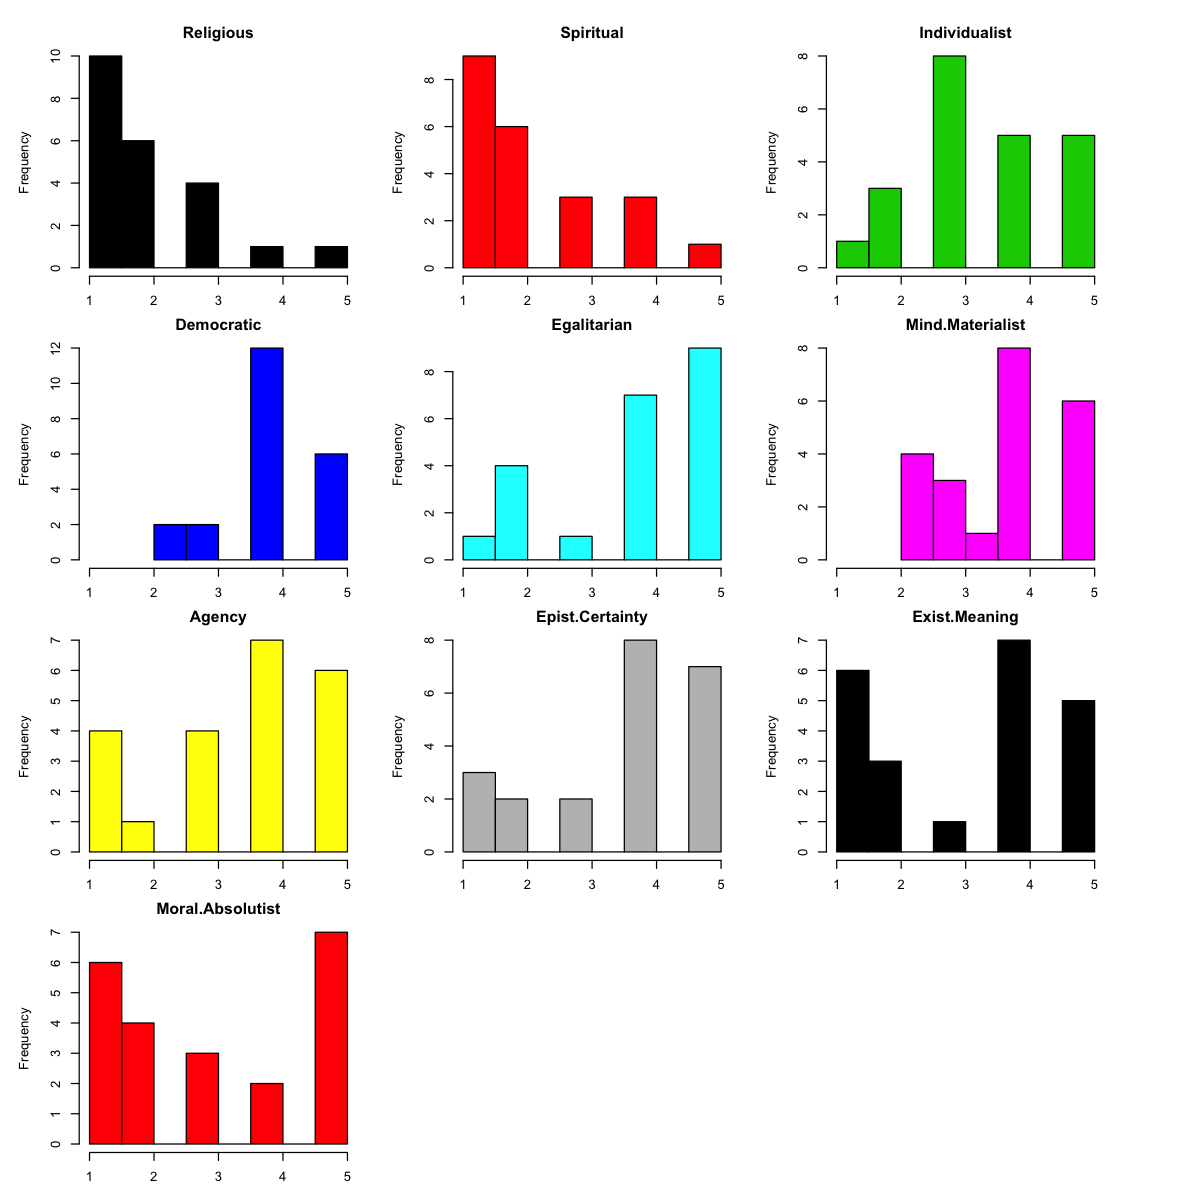

In [42]:
options(repr.plot.width=10, repr.plot.height=10)
par(mar = c(2, 4, 2, 2), mfrow = c(4, 3), oma=c(1,1,1,4))
colors <- c(palette()[1:8],palette()[1:2])
for(i in 1:10){
    hist(bl[,i],breaks=10,col=colors[i],main=names(bl[i]),xlim=c(1,5),ylab='Frequency')
    }

### 3. How many factors are required to satisfactorily explain variation in data?

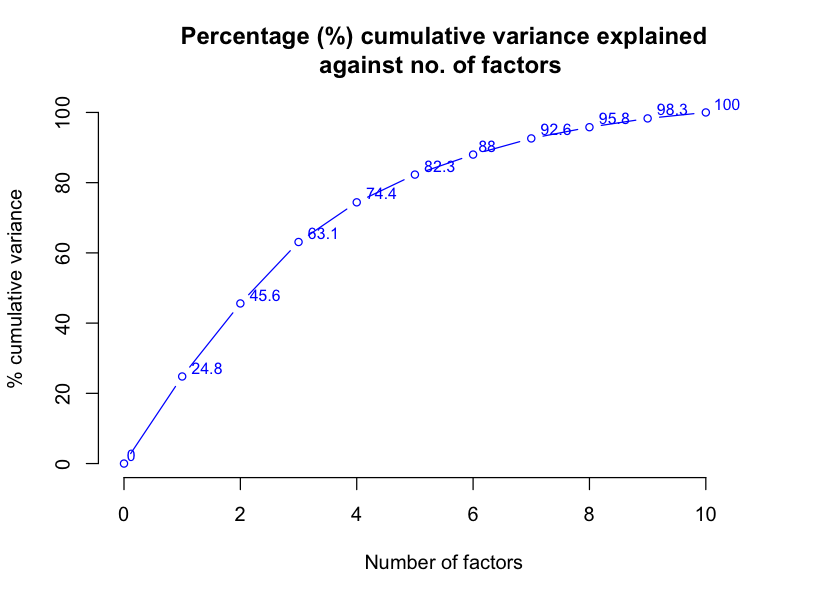

In [43]:
#Principal components analysis
bpc <- princomp(bl)
result <- data.frame('factors'=c(1:10),'variance'=(bpc$sdev)^2/sum((bpc$sdev)^2)*100)
#Cumulative variance
cuml <- c()
for (i in 1:10){
  if(i==1)
    cuml[i] <- round(result$variance[i],1)
  else{
    k = i-1
    cuml[i] <- round(result$variance[i] + cuml[k],1)
  }
}
result$cuml.variance <- cuml
result <- rbind(c(0,0,0),result)
#Plot
options(repr.plot.width=7, repr.plot.height=5)
plot(c(0:10),result$cuml.variance, type='b',col='blue',cex=0.8,ylim=c(0,100),xlim=c(0,11),
     bty='n',
     xlab='Number of factors', ylab='% cumulative variance',
     main='Percentage (%) cumulative variance explained\nagainst no. of factors ')
library(calibrate)
textxy(result$factors,result$cuml.variance,result$cuml.variance,cex=0.8, col='blue')

**4 factors are able to explain ~75% of variation in data**

### 4. Which questions load highly on each factor?
**Positive loadings suggest that high scores are significant on that factor; negative loadings suggest low scores are significant on that factor. For e.g. a loading of -0.4 by the 'Religious' question on Factor 1 indicates that lack of religiosity is somewhat important to account for that factor.**

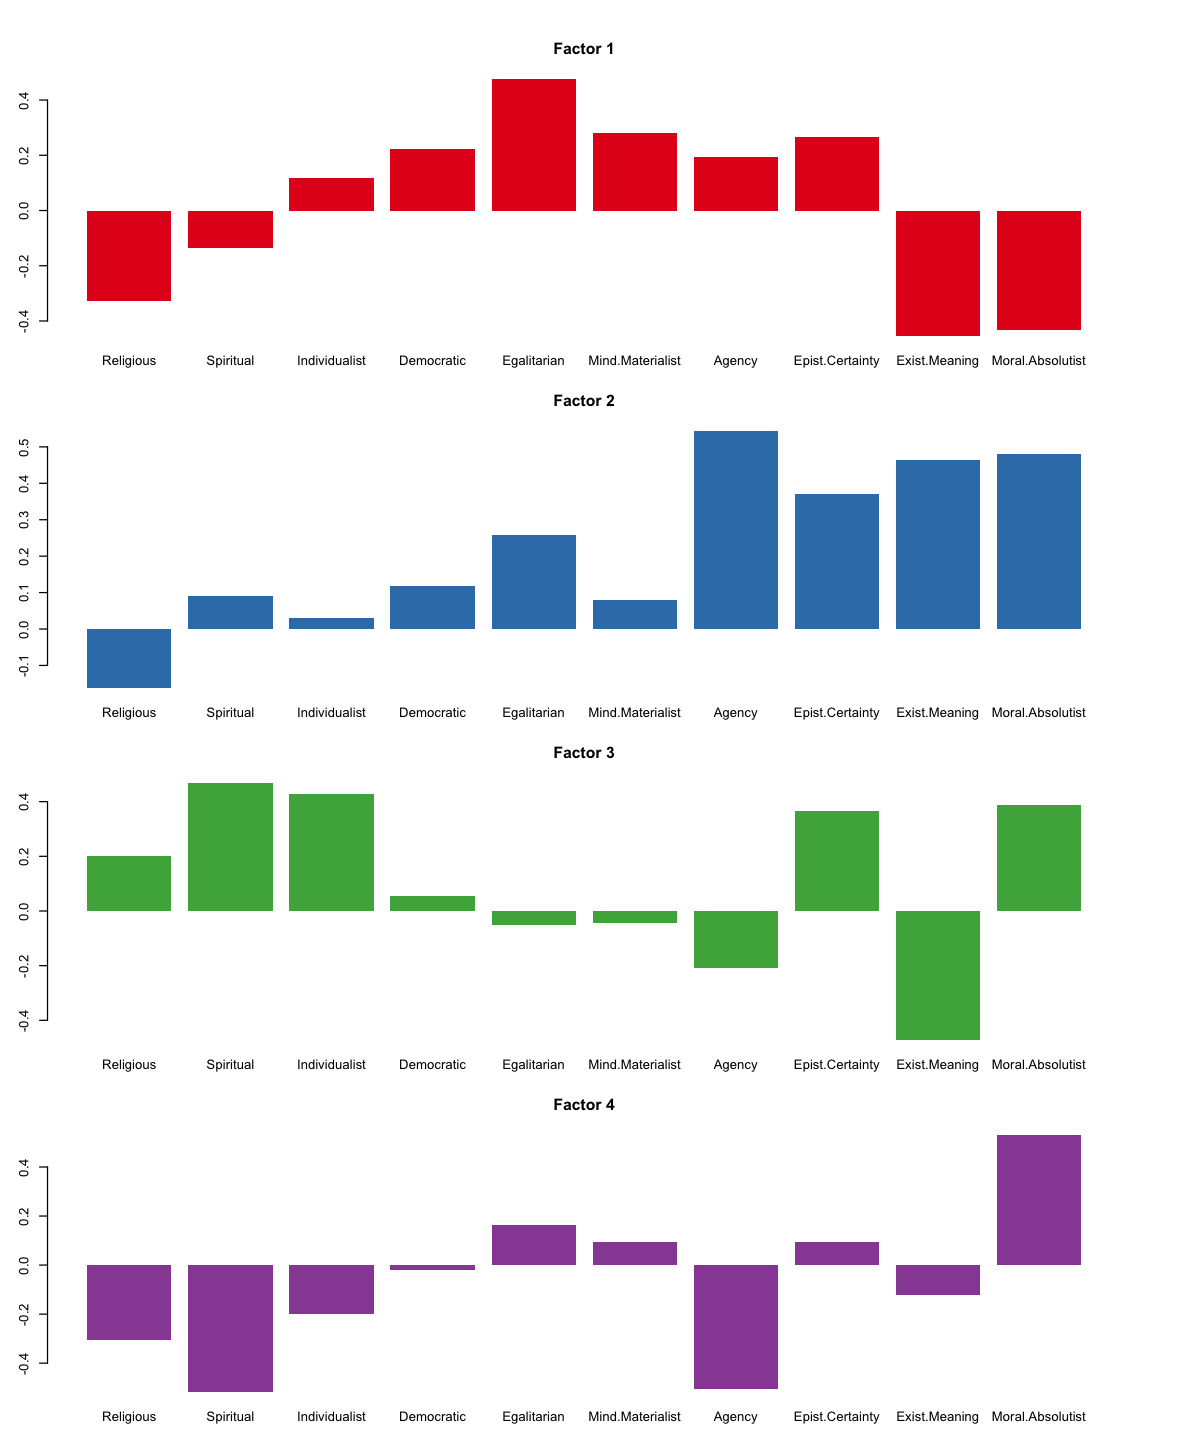

In [46]:
#bpc$loadings
options(repr.plot.width=10, repr.plot.height=12)
library(RColorBrewer)
colors <- brewer.pal(4,'Set1')
par(mar = c(2, 2, 4, 1), mfrow = c(4, 1), oma=c(1,1,1,4))
for (i in 1:4){
    barplot(bpc$loadings[,i],main=paste0('Factor ',i),col=colors[i],border=NA)
}